In [2]:
# 04. 자동 미분과 선형회귀 실습

import tensorflow as tf

w = tf.Variable(2.)
# print(w)

def f(w):
  y = w**2
  return 2 * y + 5

with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [5]:
# gradient_tape test

x = tf.Variable(10.0)
print(x.numpy()) # 변수.numpy() fm
with tf.GradientTape() as tape:
  y = x**3

dy_dx = tape.gradient(y, x)
print(dy_dx)
print(dy_dx.numpy())

10.0
tf.Tensor(300.0, shape=(), dtype=float32)
300.0


In [8]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x):
  return w * x + b

In [9]:
x_test = [1.2, 3.7, 4.8, 6.1]
print(hypothesis(x_test))

tf.Tensor([ 5.8 15.8 20.2 25.4], shape=(4,), dtype=float32)


In [11]:
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))
  

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

optimizer = tf.optimizers.SGD(0.01)

for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
# Define Sequential model with 3 layers
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_dim=1))

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 670ms/step - loss: 4749.1206 - mse: 4749.1206
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 585.4913 - mse: 585.4913
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 73.1864 - mse: 73.1864
Epoch 4/300
1/1 [==============================] - 0s 13ms/step - loss: 10.1493 - mse: 10.1493
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 2.3913 - mse: 2.3913
Epoch 6/300
1/1 [==============================] - 0s 15ms/step - loss: 1.4350 - mse: 1.4350
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 1.3156 - mse: 1.3156
Epoch 8/300
1/1 [==============================] - 0s 19ms/step - loss: 1.2992 - mse: 1.2992
Epoch 9/300
1/1 [==============================] - 0s 17ms/step - loss: 1.2955 - mse: 1.2955
Epoch 10/300
1/1 [==============================] - 0s 19ms/step - loss: 1.2933 - mse: 1.2933
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - 

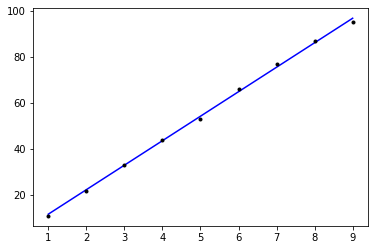

In [24]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [26]:
print(model.predict([2.1]))

[[23.452322]]


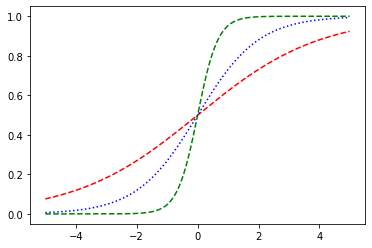

In [31]:
# sigmoid 그리기

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5, 0.01)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(3 * x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'b', linestyle=':')
plt.plot(x, y3, 'g', linestyle='--')

In [32]:
# Logistic Regression using Keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 749ms/step - loss: 12.0688 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 0.3117 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 0.3047 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 0.2979 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2912 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2846 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2781 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2718 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2656 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 

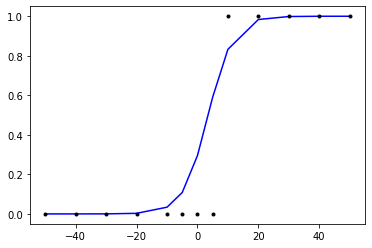

In [33]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [34]:
print(model.predict([-100, 1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[7.4962866e-12]
 [3.4921053e-01]
 [4.0732259e-01]
 [4.6814856e-01]
 [5.2993613e-01]
 [5.6060576e-01]]
[[0.86437964]
 [0.9869627 ]
 [0.9988891 ]
 [0.9999063 ]
 [1.        ]]


In [35]:
# 다중회귀 테스트

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

Epoch 1/2000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 466ms/step - loss: 11142.5361 - mse: 11142.5361
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 5967.5068 - mse: 5967.5068
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 3214.0396 - mse: 3214.0396
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 1745.6033 - mse: 1745.6033
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 960.2162 - mse: 960.2162
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 538.6463 - mse: 538.6463
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 311.3540 - mse: 311.3540
Epoch 8/2000
1/1 [==============================] - 0s 15ms/step - loss: 188.1315 - mse: 188.1315
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 120.8707 - mse: 120.8707
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 83.8427 - mse: 83.8427
Epoch 11/2000
1/1 [============

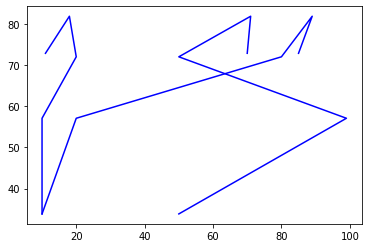

In [36]:
plt.plot(X, model.predict(X), 'b')

In [37]:
# 다중 로지스틱 회귀

X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 589ms/step - loss: 1.2575 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.2539 - binary_accuracy: 0.3333
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.2503 - binary_accuracy: 0.3333
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.2468 - binary_accuracy: 0.3333
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.2432 - binary_accuracy: 0.3333
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.2397 - binary_accuracy: 0.3333
Epoch 7/2000
1/1 [==============================] - 0s 15ms/step - loss: 1.2361 - binary_accuracy: 0.3333
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.2326 - binary_accuracy: 0.3333
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.2292 - binary_accuracy: 0.3333
Epoch 10/2000
1/1 [==============================] 

In [38]:
print(model.predict(X))

[[0.24454814]
 [0.4873788 ]
 [0.49103042]
 [0.7363169 ]
 [0.7391443 ]
 [0.7419521 ]]


In [39]:
d = np.array(5)
print(d.ndim)
print(d.shape)

0
()


In [40]:
d = np.array([3])
print(d.ndim)
print(d.shape)

1
(1,)


In [41]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


In [42]:
# 3차원
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)
